# Задача обнаружения аномалий

Данные Ак Барс банка по транзакциям людей, имеющих кредит

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
transactions = pd.read_excel("/content/drive/MyDrive/АББ_Карты.xlsx", sheet_name='Транзакции')

In [ ]:
appData = pd.read_excel("/content/drive/MyDrive/АББ_Карты.xlsx", sheet_name='Заявки')

In [ ]:
transactions.head()

,Идентификатор Клиента,Тип операции,Направление транзакции,Дата транзакции,Сумма транзакции,Валюта транзакции,Сумма транзакции в валюте платежной системы,Валюта платежной системы,MCC-код транзакции,MCC-код транзакции (наименование),Бизнес-тип операции,Признак принадлежности транзакции в банкомате АББ,Признак принадлежности транзакции в стороннем банкомате,Тип карты
0,id_1912,Transaction,-1,2019-11-08,69.00,Russian Ruble,69.00,Russian Ruble,4899,4899 Cable Services,Покупка в ТСП через чужой POS,0,0,Дебетовая карта
1,id_1912,Transaction,-1,2019-11-28,80.00,Russian Ruble,80.00,Russian Ruble,6012,6012 Member Financial Institutio,Прочее,0,0,Дебетовая карта
2,id_0874,Transaction,1,2019-10-18,13000.00,Russian Ruble,13000.00,Russian Ruble,6012,6012 Member Financial Institutio,Зачисление средств на карточный счет через инф...,0,0,Дебетовая карта
3,id_0874,Transaction,-1,2019-12-03,113.24,Russian Ruble,113.24,Russian Ruble,5411,"5411 Grocery Stores,supermarkets",Покупка в ТСП через POS АББ,0,0,Дебетовая карта
4,id_0874,Transaction,1,2019-10-30,5000.00,Russian Ruble,5000.00,Russian Ruble,6012,6012 Member Financial Institutio,Зачисление средств на карточный счет через инф...,0,0,Дебетовая карта


In [ ]:
appData.head()

,ID (Идентификатор Заявки),ID (Идентификатор Клиента),Дата заявки,Target (Доход)
0,N_0001,id_0001,2018-04-25,42757.16
1,N_0002,id_0002,2018-04-27,75932.43
2,N_0003,id_0003,2018-05-23,42340.00
3,N_0004,id_0004,2018-06-01,355876.44
4,N_0005,id_0005,2018-02-27,50000.00


In [ ]:
tr = pd.DataFrame(transactions).copy()

In [ ]:
tr.shape

(934556, 14)

In [ ]:
df = pd.DataFrame(appData).copy()
df = df.drop(['ID (Идентификатор Заявки)', 'Дата заявки'], axis=1)
df.rename(columns={'ID (Идентификатор Клиента)': 'id', 'Target (Доход)': 'Доход'}, inplace=True)

## Выделим основные категории расходов людей :

Медицинские услуги

In [ ]:
df['Медицина'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([8099, 8021, 8062, 8011, 8071]))]['Сумма транзакции']))

Развлечения – кино, театры, путешествия и т.д.

In [ ]:
df['Развлечения'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([7832, 7994, 5192, 4722, 3047, 4582, 3000]))]['Сумма транзакции']) ) 

Техника

In [ ]:
df['Техника'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([4814, 4816, 5732, 5200, 5311]))]['Сумма транзакции']) ) 

Одежда 

In [ ]:
df['Одежда'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([5651, 5661, 5977, 5691]))]['Сумма транзакции']) ) 

Дети – одежда, питания, уход за детьми

In [ ]:
df['Дети'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([5641, 8351]))]['Сумма транзакции']) ) 

Еда – рестораны, кафе, супермаркеты, фаст-фуд, пекарни

In [ ]:
df['Еда'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([5411, 5814, 5499, 5812, 5451, 5813, 5462]))]['Сумма транзакции']) ) 

Транспорт – проезд, ржд, авиабилеты(внутри страны), бензин, уход за транспортом

In [ ]:
df['Транспорт'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['MCC-код транзакции'].isin([4131, 4121, 7542, 4112, 5542, 7523]))]['Сумма транзакции']) ) 

Платежи по налогам

In [ ]:
df['Налоги'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & ((tr['MCC-код транзакции'] == 9311))]['Сумма транзакции']) ) 

Все расходы человека

In [ ]:
df['Все расходы'] = df.id.apply(lambda x: sum(tr[(tr['Идентификатор Клиента'] == x) & (tr['Направление транзакции'] == -1)]['Сумма транзакции']))

### Получаем следующий Dataframe по расходам:

In [ ]:
df.head()

,id,Доход,Медицина,Развлечения,Техника,Одежда,Дети,Еда,Транспорт,Налоги,Все расходы
0,id_0001,42757.16,0.0,0.0,368.65,4139.00,0.0,1501.03,175.00,0.0,110869.68
1,id_0002,75932.43,13614.0,4074.0,132151.26,43510.45,4937.4,323821.22,78472.10,4160.0,3324984.92
2,id_0003,42340.00,0.0,0.0,4642.80,883.55,0.0,1834.40,0.00,1467.0,1110341.20
3,id_0004,355876.44,0.0,1934.0,21536.65,9717.00,468.0,28665.86,50237.67,0.0,4478743.54
4,id_0005,50000.00,0.0,0.0,330.00,104.00,0.0,324.00,0.00,0.0,230300.00


### Создадим копию нашего DataFrame

In [ ]:
t = pd.DataFrame(df).copy()

In [ ]:
t

,id,Доход,Медицина,Развлечения,Техника,Одежда,Дети,Еда,Транспорт,Налоги,Все расходы
0,id_0001,42757.16,0.0,0.0,368.65,4139.00,0.0,1501.03,175.00,0.0,110869.68
1,id_0002,75932.43,13614.0,4074.0,132151.26,43510.45,4937.4,323821.22,78472.10,4160.0,3324984.92
2,id_0003,42340.00,0.0,0.0,4642.80,883.55,0.0,1834.40,0.00,1467.0,1110341.20
3,id_0004,355876.44,0.0,1934.0,21536.65,9717.00,468.0,28665.86,50237.67,0.0,4478743.54
4,id_0005,50000.00,0.0,0.0,330.00,104.00,0.0,324.00,0.00,0.0,230300.00
...,...,...,...,...,...,...,...,...,...,...,...
2577,id_2444,70551.11,0.0,0.0,2072.00,0.00,0.0,529.00,0.00,0.0,3001.00
2578,id_2445,107748.19,0.0,0.0,2916.00,499.00,0.0,11377.72,4196.10,0.0,256629.33
2579,id_1775,48358.92,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,181485.00
2580,id_2446,52200.00,0.0,0.0,0.00,12020.50,0.0,6752.39,0.00,430.0,99776.54


### Мы имеем 2582 строки,некоторые строки имеют нули почти во всех столбцах, удалим эти строки:

In [ ]:
t = t.drop(t[(t['Медицина'] == 0) & 
             (t['Развлечения'] == 0) & 
             (t['Техника'] == 0) & 
             (t['Одежда'] == 0) & 
             (t['Дети'] == 0) &
             (t['Еда'] == 0) &
             (t['Транспорт'] == 0) &
             (t['Налоги'] == 0)].index)

In [ ]:
t

,id,Доход,Медицина,Развлечения,Техника,Одежда,Дети,Еда,Транспорт,Налоги,Все расходы
0,id_0001,42757.16,0.0,0.0,368.65,4139.00,0.0,1501.03,175.00,0.0,110869.68
1,id_0002,75932.43,13614.0,4074.0,132151.26,43510.45,4937.4,323821.22,78472.10,4160.0,3324984.92
2,id_0003,42340.00,0.0,0.0,4642.80,883.55,0.0,1834.40,0.00,1467.0,1110341.20
3,id_0004,355876.44,0.0,1934.0,21536.65,9717.00,468.0,28665.86,50237.67,0.0,4478743.54
4,id_0005,50000.00,0.0,0.0,330.00,104.00,0.0,324.00,0.00,0.0,230300.00
...,...,...,...,...,...,...,...,...,...,...,...
2574,id_2441,62060.27,0.0,350.0,0.00,0.00,0.0,943.88,0.00,0.0,151304.43
2575,id_2442,46005.15,0.0,0.0,0.00,2000.00,0.0,2064.00,0.00,0.0,552440.92
2577,id_2444,70551.11,0.0,0.0,2072.00,0.00,0.0,529.00,0.00,0.0,3001.00
2578,id_2445,107748.19,0.0,0.0,2916.00,499.00,0.0,11377.72,4196.10,0.0,256629.33


### Удалилось 230 строк

In [ ]:
t.corr()

,Доход,Медицина,Развлечения,Техника,Одежда,Дети,Еда,Транспорт,Налоги,Все расходы
Доход,1.000000,0.069487,0.007347,0.056123,0.074303,0.023455,0.055359,0.107031,0.035579,0.065901
Медицина,0.069487,1.000000,0.069285,0.201117,0.349400,0.198267,0.315371,0.167496,0.105192,0.156347
Развлечения,0.007347,0.069285,1.000000,0.134782,0.087036,0.014983,0.114473,0.081176,0.045794,0.110486
Техника,0.056123,0.201117,0.134782,1.000000,0.323186,0.190113,0.365981,0.172532,0.312039,0.238832
Одежда,0.074303,0.349400,0.087036,0.323186,1.000000,0.326040,0.470585,0.278015,0.200358,0.284199
Дети,0.023455,0.198267,0.014983,0.190113,0.326040,1.000000,0.263439,0.111876,0.158366,0.133445
Еда,0.055359,0.315371,0.114473,0.365981,0.470585,0.263439,1.000000,0.407422,0.244653,0.288750
Транспорт,0.107031,0.167496,0.081176,0.172532,0.278015,0.111876,0.407422,1.000000,0.130034,0.180066
Налоги,0.035579,0.105192,0.045794,0.312039,0.200358,0.158366,0.244653,0.130034,1.000000,0.171428
Все расходы,0.065901,0.156347,0.110486,0.238832,0.284199,0.133445,0.288750,0.180066,0.171428,1.000000


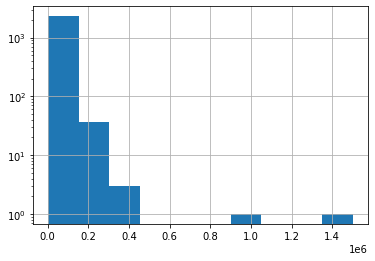

In [ ]:
t['Доход'].hist(log=True)

На гистограмме доходов можно заметить два потенциальных выброса

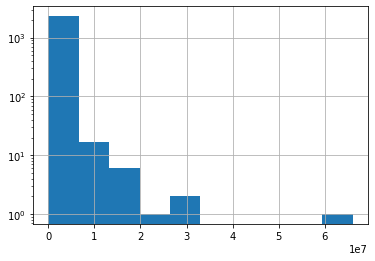

In [ ]:
t['Все расходы'].hist(log=True)

На гистограмме всех расходов можно заметить один потенциальный выброс

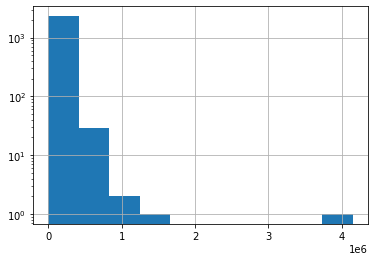

In [ ]:
t['Еда'].hist(log=True)

На гистограмме расходов на еду можно заметить один потенциальный выброс

## Построим кластеры для разных категорий расходов

In [ ]:
from pandas.core.common import random_state
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import plotly.offline as py
import matplotlib.pyplot as plt

### Определяем количество кластеров с малой ошибкой:

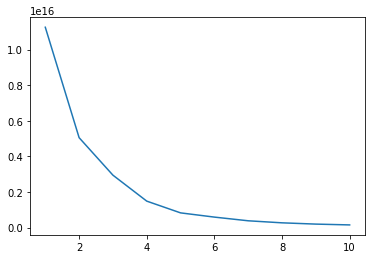

In [ ]:
X = t.loc[:, ['Все расходы', 'Доход']].values

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()


Видим что оптимальное количество кластеров 4

In [ ]:
hc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_hc = hc.fit(X)

### Построим график:

In [ ]:
import plotly.graph_objs as go


trace1 = go.Scatter(x=t['Все расходы'], y=t['Доход'], mode='markers',
     marker=dict(
        color = y_hc.labels_, 
        size= 10,
        line=dict(
            color= y_hc.labels_,
            width= 12
        ),
        opacity=0.8
     ))

qw = [trace1]

layout = go.Layout(
    height = 500,
    width = 1300,
    xaxis_title="Все расходы",
    yaxis_title="Доход",
)

fig = go.Figure(data = qw, layout = layout)
py.iplot(fig)

Видим что есть выбросы которы образуют новый кластер

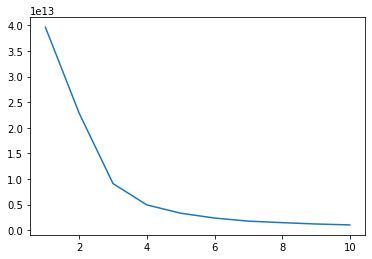

In [ ]:
X = t.loc[:, ['Еда', 'Одежда']].values

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()

In [ ]:
hc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_hc = hc.fit(X)

trace1 = go.Scatter(x=t['Еда'], y=t['Одежда'], mode='markers',
     marker=dict(
        color = y_hc.labels_, 
        size= 10,
        line=dict(
            color= y_hc.labels_,
            width= 12
        ),
        opacity=0.8
     ))

qw = [trace1]

layout = go.Layout(
    height = 500,
    width = 1300,
    xaxis_title="Еда",
    yaxis_title="Одежда",
)

fig = go.Figure(data = qw, layout = layout)
py.iplot(fig)

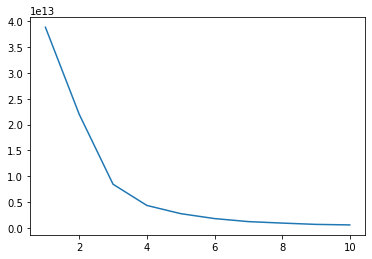

In [ ]:
X = t.loc[:, ['Еда', 'Транспорт']].values

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()

In [ ]:
hc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_hc = hc.fit(X)

trace1 = go.Scatter(x=t['Еда'], y=t['Транспорт'], mode='markers',
     marker=dict(
        color = y_hc.labels_, 
        size= 10,
        line=dict(
            color= y_hc.labels_,
            width= 12
        ),
        opacity=0.8
     ))

qw = [trace1]

layout = go.Layout(
    height = 500,
    width = 1300,
    xaxis_title="Еда",
    yaxis_title="Транспорт",
)

fig = go.Figure(data = qw, layout = layout)
py.iplot(fig)

## Теперь построим трёхмерный график кластеров:

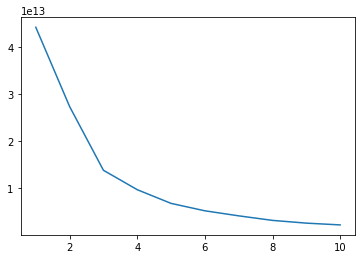

In [ ]:
X = t.loc[:, ['Еда', 'Транспорт', 'Доход']].values

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.show()

In [ ]:
# import plotly as ply
import pandas as pd


scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",
    x = t['Еда'], y = t['Транспорт'], z = t['Доход'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",
    x = t['Еда'], y = t['Транспорт'], z = t['Доход'],
)
layout = dict(
    scene = dict(
        xaxis = dict(title  = 'Еда'),
        yaxis = dict(title  = 'Транспорт'),
        zaxis = dict(title  = 'Доход')
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
py.iplot(fig)

Видим что есть выбросы